# One-dimensional glitch example

This notebook derives the equations for a one-dimensional glitch example.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

from scipy.optimize import newton
from sympy import latex, exp, sin, cos, re, im, atan
from sympy import I as i
from ipywidgets import interact
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


In [12]:
%%tikz
\def\labelshift{(0, -0.4)}%

\node[label={[anchor=base,shift=\labelshift]below:0}] (A) at (0, 0) {};
\node[label={[anchor=base,shift=\labelshift]below:$a$}] (B) at (4.5, 0) {};
\node[label={[anchor=base,shift=\labelshift]below:$b$}] (C) at (5.5, 0) {};
\node[label={[anchor=base,shift=\labelshift]below:$L$}] (D) at (10, 0) {};


\filldraw (A) circle (2pt) -- (B);
\draw[dashed] (B) -- (C);
\filldraw (C) -- (D) circle (2pt);

In [90]:
a, b, L = sympy.symbols("a, b, L")
omega, k, kp, x, t = sympy.symbols("omega, k, k', x, t")
A, B, R, S = sympy.symbols("A, B, R, S")

In [91]:
xi1 = exp(i * (omega * t - k * x)) + R * exp(i * (omega * t + k * x))
xi2 = A * exp(i * (omega * t - kp * x)) + B * exp(i * (omega * t + kp * x))
xi3 = S * exp(i * (omega * t - k * x))

In [93]:
boundary_conditions = [
#     xi1.subs(x, 0),
#     xi3.subs(x, L),
    (xi1 - xi2).subs(x, a),
    (xi2 - xi3).subs(x, b),
    (xi1.diff(x) - xi2.diff(x)).subs(x, a),
    (xi2.diff(x) - xi3.diff(x)).subs(x, b),
]

sol = sympy.solve(boundary_conditions, A, B, R, S)

In [66]:
xi_left = (xi1 + xi2 + xi3).simplfy()
xi_right = xi_left.subs({k: -k, kp: -kp})
xi = xi_left - xi_right

In [94]:
c, cp = sympy.symbols("c, cp")

In [95]:
RR = sol[R].simplify()
SS = sol[S].simplify()

alpha = 1/k * atan(im(RR) / (1 - re(RR)))
func = re(SS) * sin(omega/c * (L + alpha)) - im(SS) * cos(omega/c * (L + alpha))

In [99]:
numpy_func = sympy.lambdify((omega, a, b, L, c, cp), func.subs({k: omega/c, kp: omega/cp}), "numpy")

In [194]:
omega_sol = sympy.solve(func.subs({k: omega/c, kp: omega/cp}), omega)

In [208]:
numpy_omega = sympy.lambdify((a, b, L, c, cp), omega_sol[0], "numpy")

In [209]:
L0 = 1
c0 = 1

n = np.arange(1, 200)
omega0 = c0 * n * np.pi / L0

In [210]:
numpy_omega(0.93, 0.97, 1.0, c0, 0.97)

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method

<IPython.core.display.Javascript object>


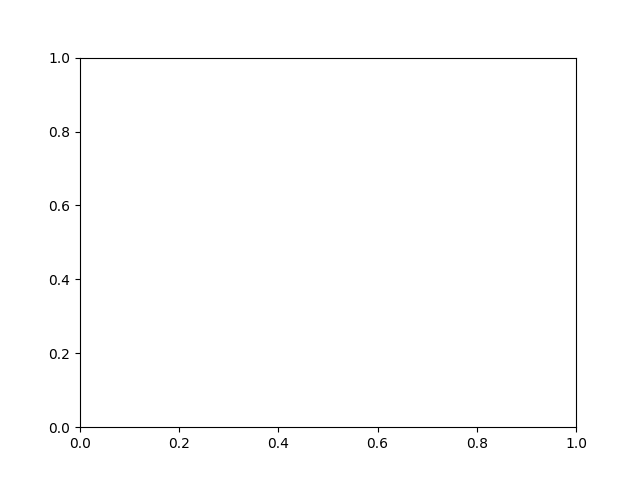

interactive(children=(FloatSlider(value=0.95, description='a', max=1.0, min=0.9, step=0.001), FloatSlider(valu…

In [197]:
%matplotlib notebook
fig, ax = plt.subplots()

@interact(a=(0.9, 1, 0.001), width=(0, 0.1, 0.001), c=(0.9, 1, 0.001))
def update(a=0.95, width=0.006, c=0.95):
    b = min(a+width, 1.0)
    args = (a, b, L0, c0, c)
#     omega_sol, converged, _ = newton(numpy_func, omega0, args=args, full_output=True)
    omega = numpy_omega(*args)
    delta_omega = omega_sol - omega0
    
    ax.clear()
    ax.plot(omega_sol[converged], delta_omega[converged], "o")
    ax.set_title(f"a={a:.3f}, b={b:.3f}, c={c:.3f}")
    ax.set_xlabel(r"$\omega$")
    ax.set_ylabel(r"$\delta\omega$")